<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/multiclass_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classification
We can go through the same steps as with binary classification.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-05-20 04:03:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  90.7MB/s    in 5.1s    

2023-05-20 04:03:15 (96.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

# Walk through the classes
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 10 directori

In [5]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# 1. Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


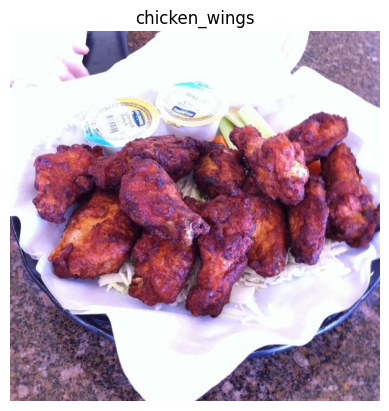

In [8]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# 2. Preprocess

# Set the seed
tf.random.set_seed(42)

# Define datagens
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [15]:
# Build a CNN (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile CNN
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data) * 0.25,
            validation_data=valid_data,
            validation_steps=len(valid_data) * 0.5)

Epoch 1/10
58/58 [==============================] - 21s 334ms/step - loss: 2.4636 - accuracy: 0.1617 - val_loss: 2.1739 - val_accuracy: 0.2031
Epoch 2/10
58/58 [==============================] - 20s 344ms/step - loss: 2.1025 - accuracy: 0.2526 - val_loss: 2.0710 - val_accuracy: 0.2398
Epoch 3/10
58/58 [==============================] - 20s 342ms/step - loss: 1.9994 - accuracy: 0.2754 - val_loss: 2.0252 - val_accuracy: 0.2766
Epoch 4/10
58/58 [==============================] - 19s 327ms/step - loss: 1.9140 - accuracy: 0.3506 - val_loss: 2.0197 - val_accuracy: 0.2898
Epoch 5/10
58/58 [==============================] - 16s 268ms/step - loss: 1.7965 - accuracy: 0.3835 - val_loss: 2.0015 - val_accuracy: 0.2875
Epoch 6/10
58/58 [==============================] - 20s 339ms/step - loss: 1.7179 - accuracy: 0.4190 - val_loss: 1.9777 - val_accuracy: 0.3125
Epoch 7/10
58/58 [==============================] - 15s 259ms/step - loss: 1.5877 - accuracy: 0.4878 - val_loss: 2.0658 - val_accuracy: 0.2758

In [17]:
# Reduce overfitting with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [18]:
model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data) * 0.25,
            validation_data=valid_data,
            validation_steps=len(valid_data) * 0.5)

Epoch 1/10
58/58 [==============================] - 38s 633ms/step - loss: 2.3056 - accuracy: 0.1234 - val_loss: 2.2141 - val_accuracy: 0.2117
Epoch 2/10
58/58 [==============================] - 39s 669ms/step - loss: 2.2294 - accuracy: 0.1849 - val_loss: 2.1802 - val_accuracy: 0.1961
Epoch 3/10
58/58 [==============================] - 37s 632ms/step - loss: 2.1412 - accuracy: 0.2198 - val_loss: 2.1040 - val_accuracy: 0.2688
Epoch 4/10
58/58 [==============================] - 38s 651ms/step - loss: 2.1352 - accuracy: 0.2426 - val_loss: 2.0311 - val_accuracy: 0.2852
Epoch 5/10
58/58 [==============================] - 37s 632ms/step - loss: 2.0982 - accuracy: 0.2505 - val_loss: 1.9745 - val_accuracy: 0.3102
Epoch 6/10
58/58 [==============================] - 33s 557ms/step - loss: 2.0371 - accuracy: 0.2781 - val_loss: 1.9879 - val_accuracy: 0.2906
Epoch 7/10
58/58 [==============================] - 37s 634ms/step - loss: 2.0575 - accuracy: 0.2859 - val_loss: 1.9631 - val_accuracy: 0.3125